<a href="https://colab.research.google.com/github/abhilashmarathe/data_science_basics/blob/main/Day4_ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SECTION 1 – Data Overview**

1. Load cleaned_data.csv and display the first 10 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_data.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.580044,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.650112,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.272505,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.419458,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.419458,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,-0.041851,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,1.880269,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,-2.117740,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,-0.195620,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,-1.195123,1,0,237736,30.0708,NaN,C


2. What are the shape (rows, columns) and size of the dataset?

In [2]:
df.shape

(891, 12)

3. List all column names and their data types.

In [3]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


4. Identify numeric columns and categorical columns separately.

In [4]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [5]:
numeric_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
categorical_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

5. Are there any missing values remaining? Provide a summary using a table or heatmap.

In [7]:
missing_values = df.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **SECTION 2 – Descriptive Statistics**

6. Generate .describe() for numeric columns — identify:

In [8]:
# highest mean

df.describe().loc['mean'].idxmax()

'PassengerId'

In [9]:
# lowest standard deviation

df.describe().loc['std'].idxmin()

'Survived'

In [10]:
# column with the largest range

df.describe().loc['max'] - df.describe().loc['min']

,0
PassengerId,890.000000
Survived,1.000000
Pclass,2.000000
Age,6.150783
SibSp,8.000000
Parch,6.000000
Fare,512.329200


7. For categorical columns, show .value_counts() with percentages.

In [11]:
for column in categorical_columns:
    print(df[column].value_counts(normalize=True))

Name
Dooley, Mr. Patrick                                    0.001122
Braund, Mr. Owen Harris                                0.001122
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    0.001122
Heikkinen, Miss. Laina                                 0.001122
Futrelle, Mrs. Jacques Heath (Lily May Peel)           0.001122
                                                         ...   
Hewlett, Mrs. (Mary D Kingcome)                        0.001122
Vestrom, Miss. Hulda Amanda Adolfina                   0.001122
Andersson, Mr. Anders Johan                            0.001122
Saundercock, Mr. William Henry                         0.001122
Bonnell, Miss. Elizabeth                               0.001122
Name: proportion, Length: 891, dtype: float64
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
Ticket
347082              0.007856
1601                0.007856
CA. 2343            0.007856
3101295             0.006734
CA 2144             0.006734
                  

# **SECTION 3 – Univariate Analysis**

Numeric Columns

8. Plot histograms for all numeric features.

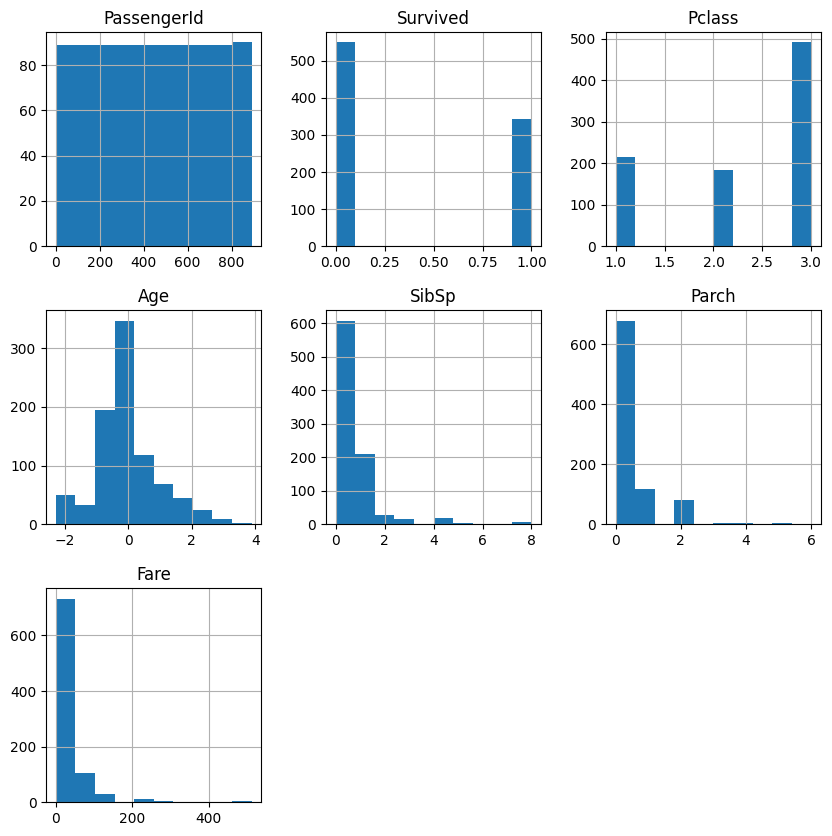

In [12]:
df.hist(figsize=(10, 10))
plt.show()

9. Identify which numeric columns are skewed (left/right/normal).

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

skewed_columns = numeric_df.skew()
skewed_columns

,0
PassengerId,0.000000
Survived,0.478523
Pclass,-0.630548
Age,0.459563
SibSp,3.695352
Parch,2.749117
Fare,4.787317


10. Plot boxplots for numeric columns to visualize outliers.

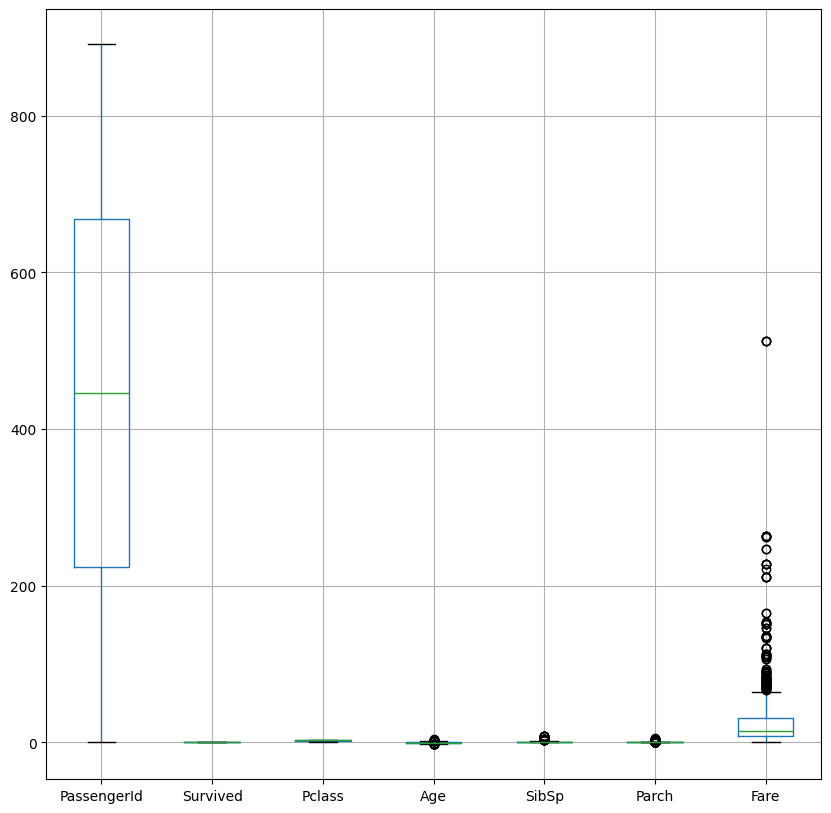

In [14]:
df.boxplot(figsize=(10, 10))
plt.show()

Categorical Columns

11. Plot bar charts for each categorical column.

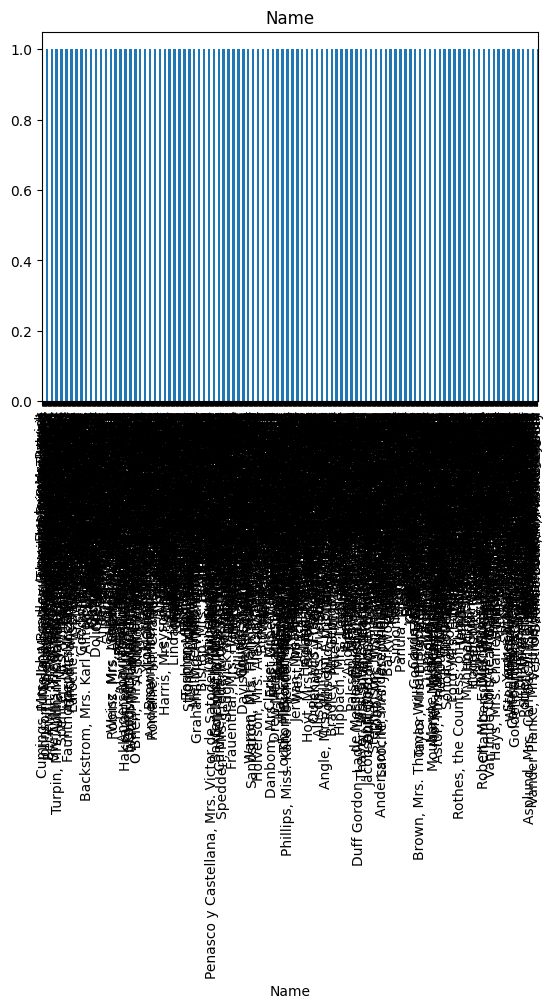

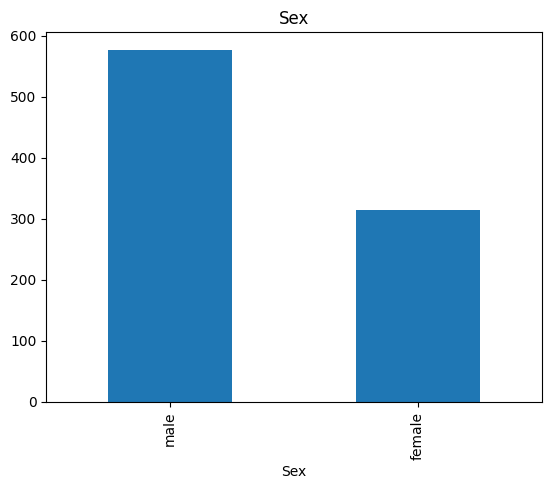

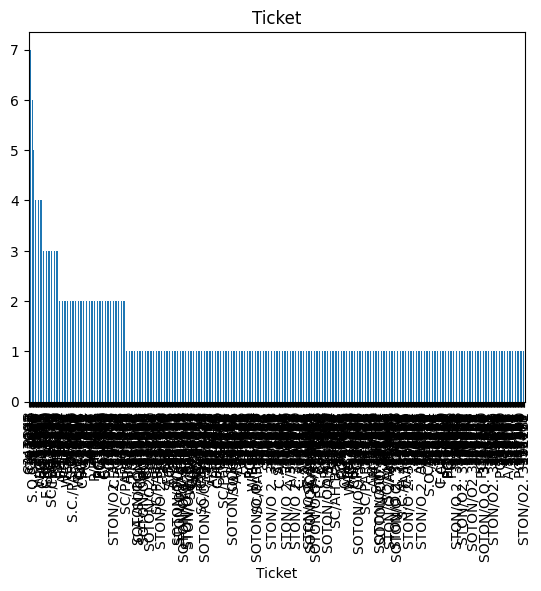

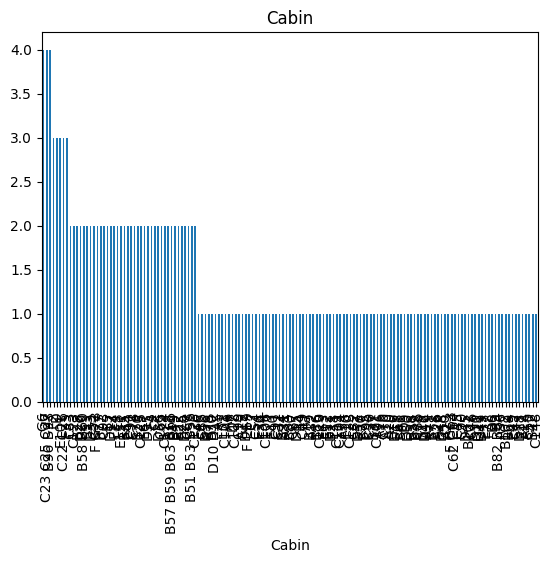

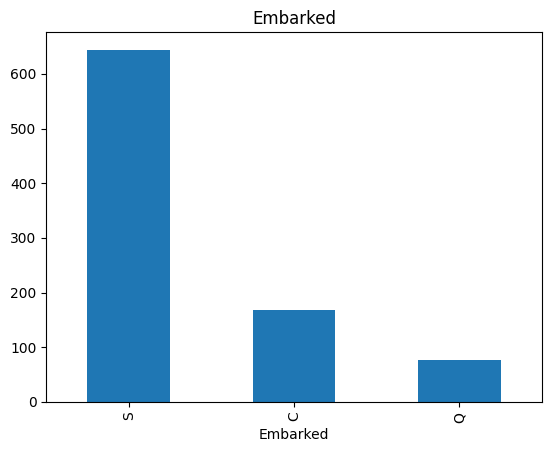

In [15]:
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

12. Identify which category is most frequent in each categorical feature.

In [16]:
# Identify which category is most frequent in each categorical feature

for column in categorical_columns:
    print(f"Most frequent category in '{column}': {df[column].mode()[0]}")

Most frequent category in 'Name': Abbing, Mr. Anthony
Most frequent category in 'Sex': male
Most frequent category in 'Ticket': 1601
Most frequent category in 'Cabin': B96 B98
Most frequent category in 'Embarked': S


# **SECTION 4 – Bivariate & Multivariate Analysis**

13. Plot scatterplots for all important numeric pairings.

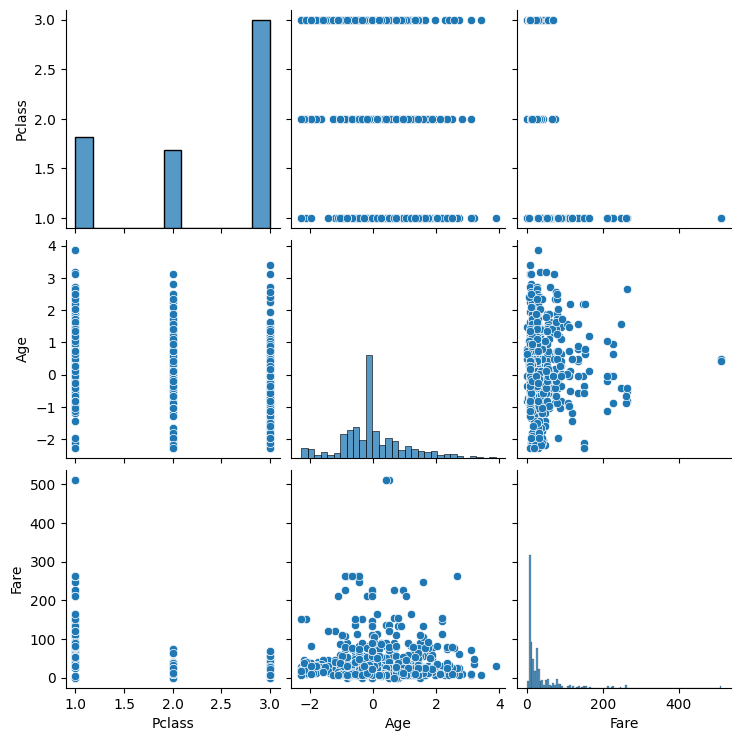

In [17]:
# Plot scatterplots for all important numeric pairings.

important_numeric_columns = ['Pclass', 'Age', 'Fare']

sns.pairplot(df[important_numeric_columns])
plt.show()

14. Create a pairplot (sns.pairplot) — describe any visible class separation or grouping.


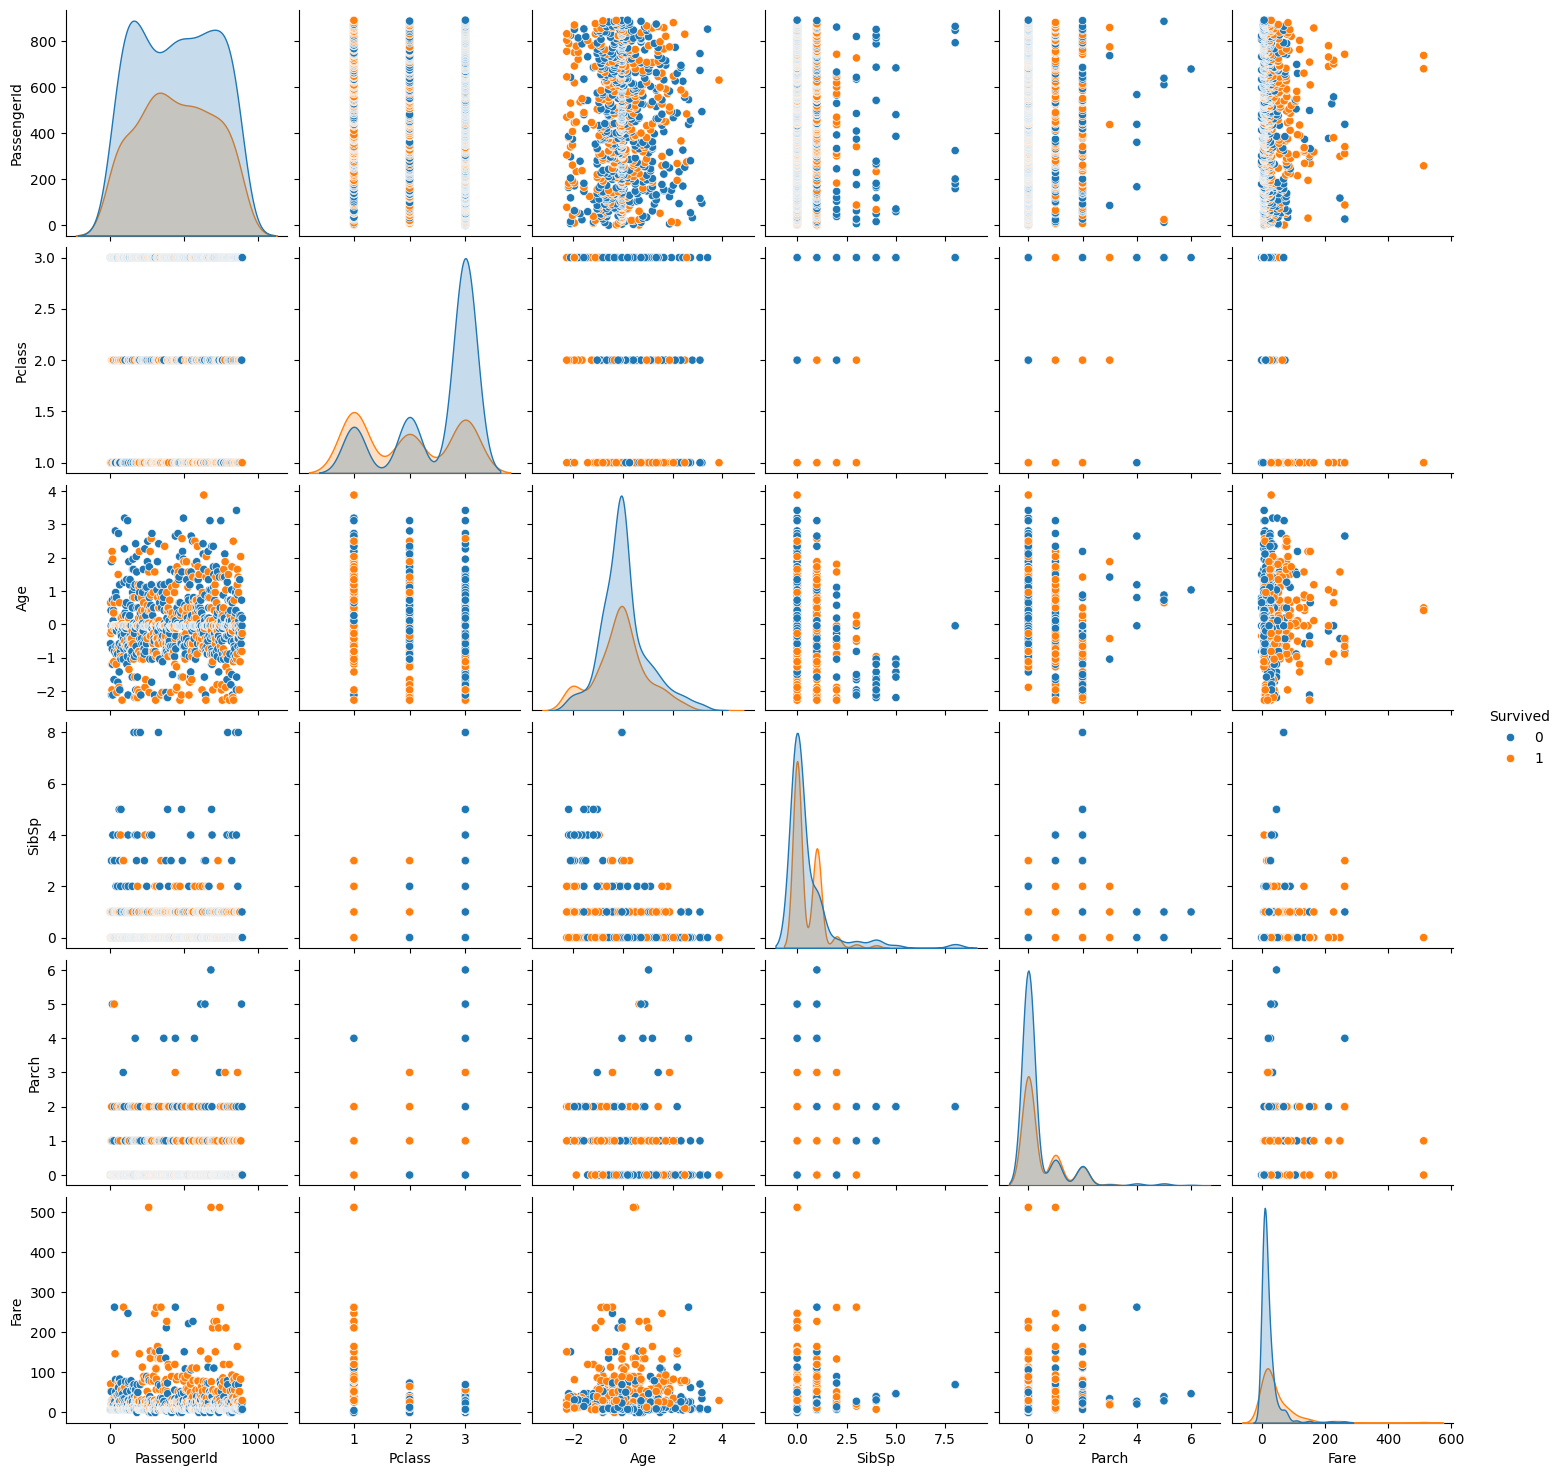

In [18]:
sns.pairplot(df, hue='Survived')
plt.show()

15. Plot boxplots of every numeric column against a categorical column (e.g., Age vs Gender).

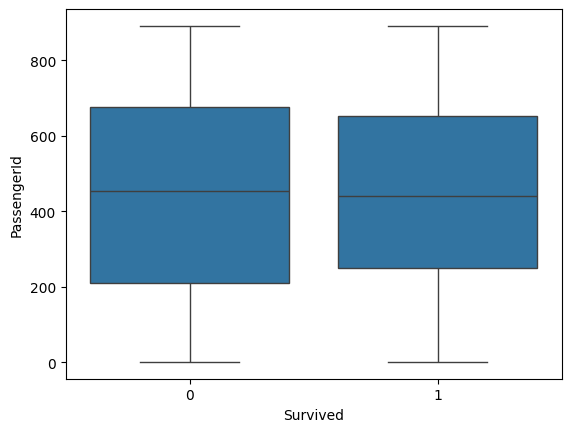

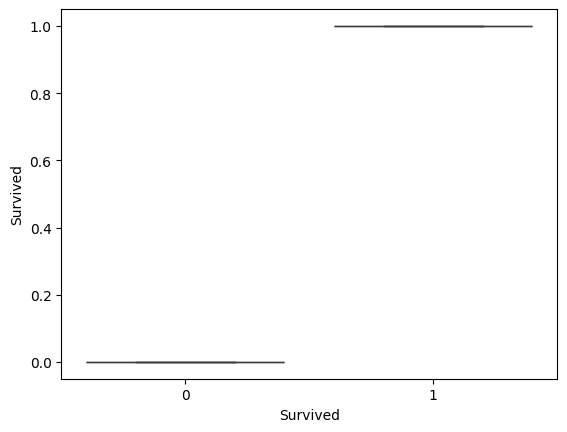

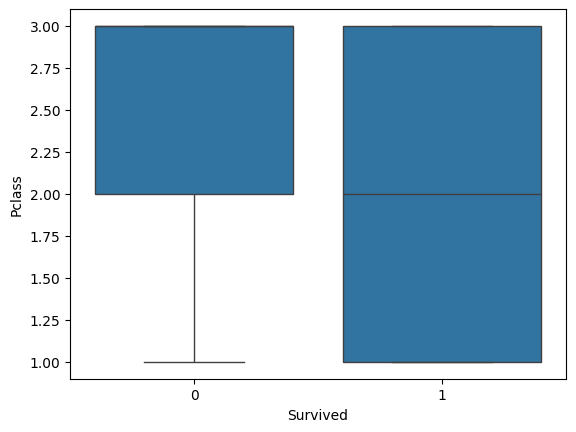

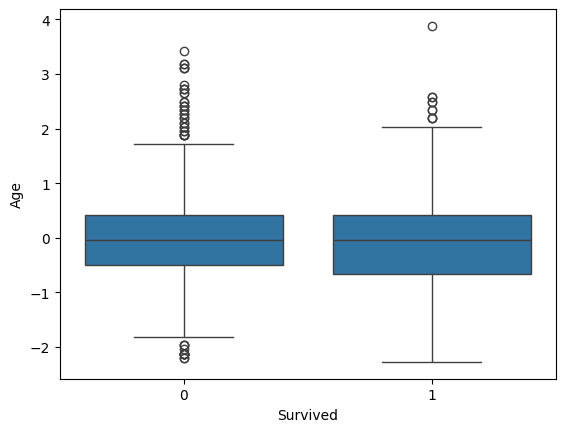

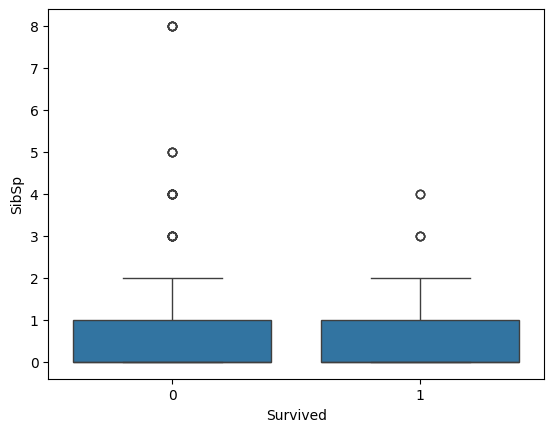

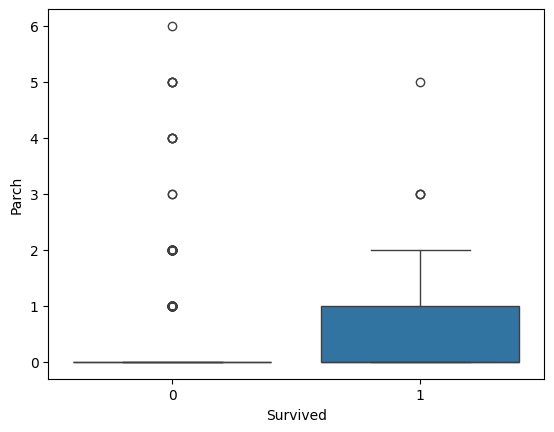

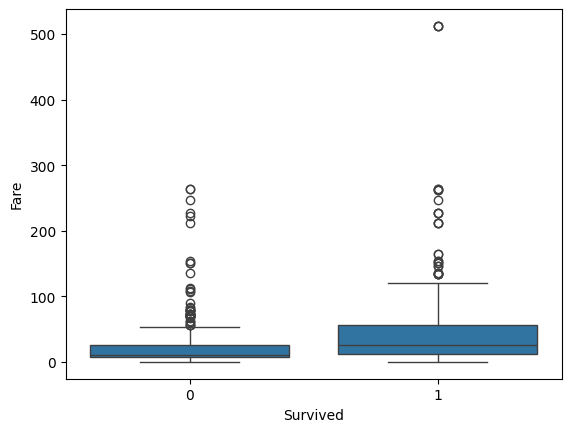

In [19]:
# Plot boxplots of every numeric column against a categorical column (e.g., Age vs Gender).

for column in numeric_columns:
    sns.boxplot(x='Survived', y=column, data=df)
    plt.show()

# **SECTION 5 – Correlation Analysis**

16. Compute the correlation matrix using .corr(numeric_only=True).

In [20]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


17. Plot a heatmap with annot=True.

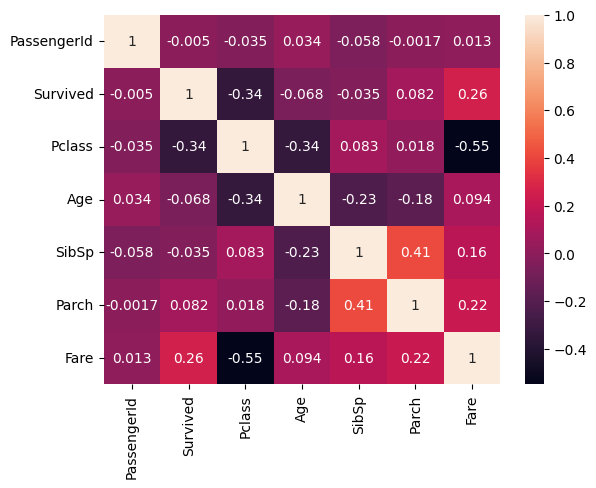

In [21]:
# Plot a heatmap with annot=True.

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

18. Identify:

Highest positive correlation pair

In [22]:
df.corr(numeric_only=True).stack().sort_values(ascending=False).head(1)

,,0
PassengerId,PassengerId,1.0


Highest negative correlation pair

In [23]:
df.corr(numeric_only=True).stack().sort_values(ascending=True).head(1)

,,0
Pclass,Fare,-0.5495


# **SECTION 6 – Outlier Detection**

19. Use IQR method to identify outliers for numeric features.

In [25]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
display(outliers)

,0
PassengerId,0
Survived,0
Pclass,0
Age,66
SibSp,46
Parch,213
Fare,116


20. Visualize outliers using:

Boxplots

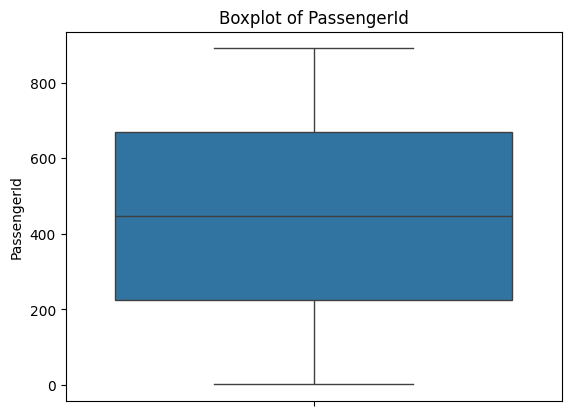

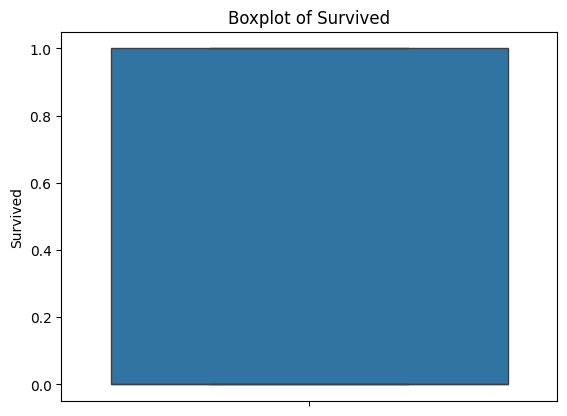

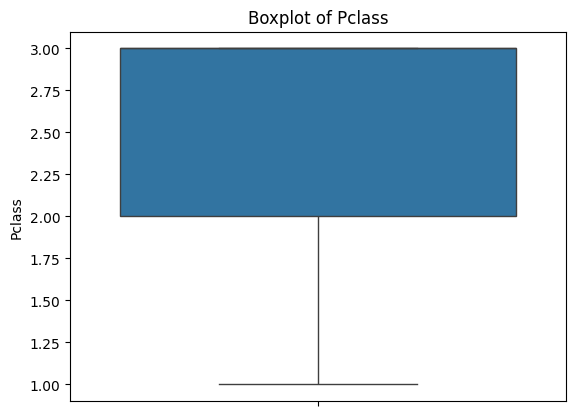

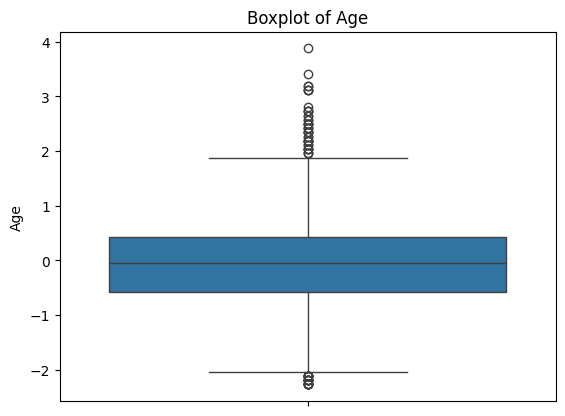

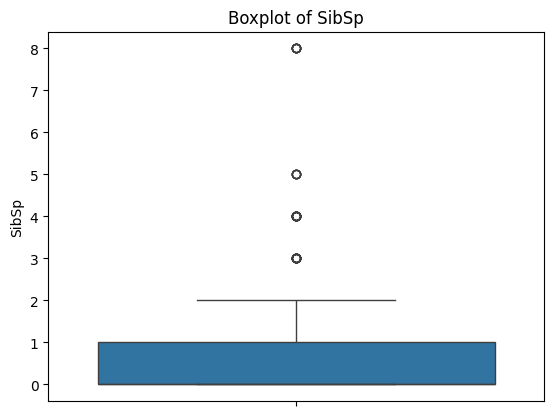

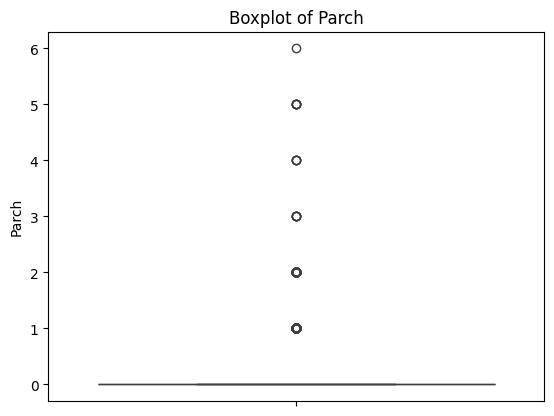

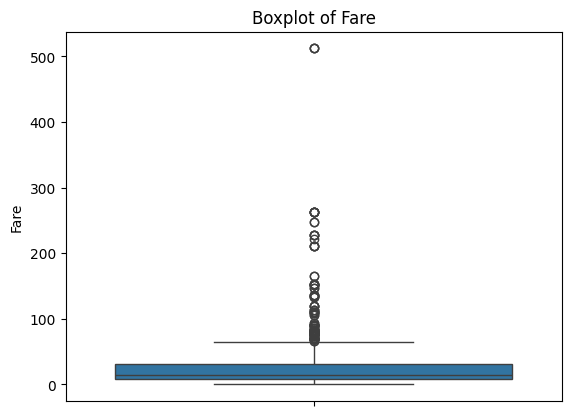

In [29]:
for column in numeric_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Scatterplots

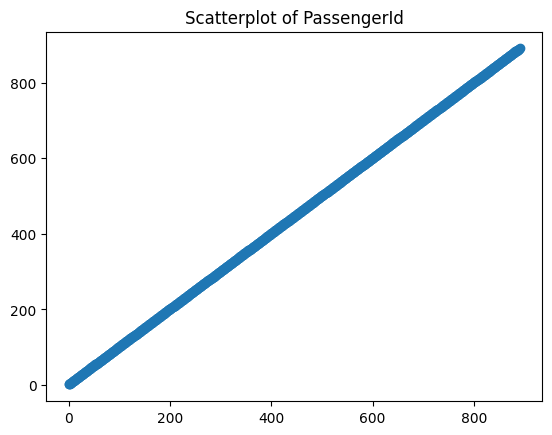

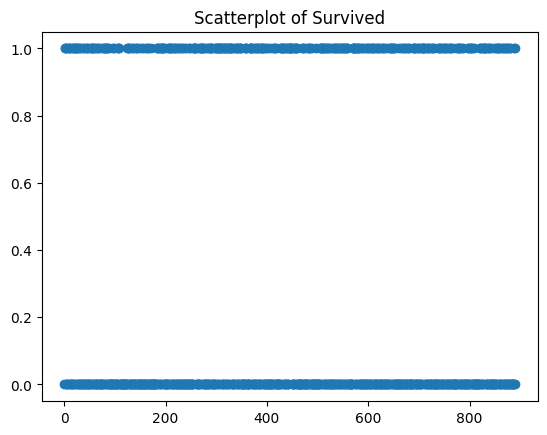

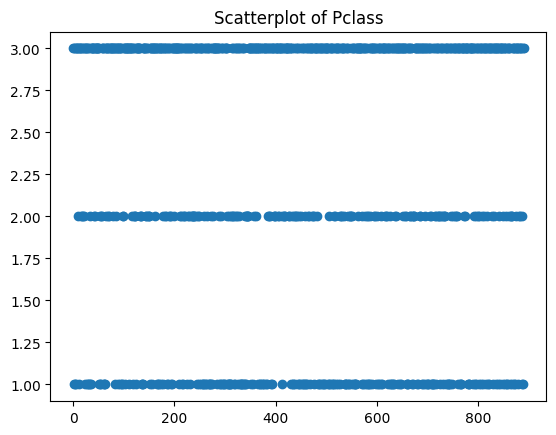

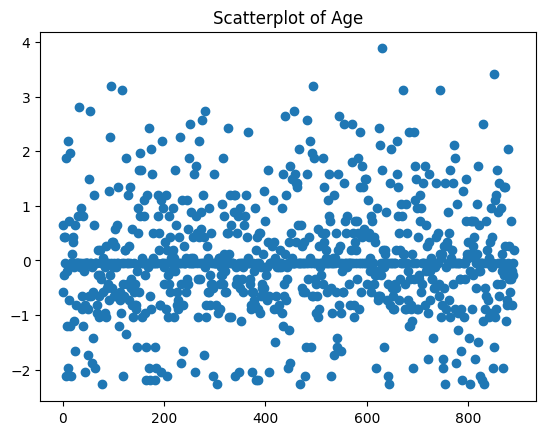

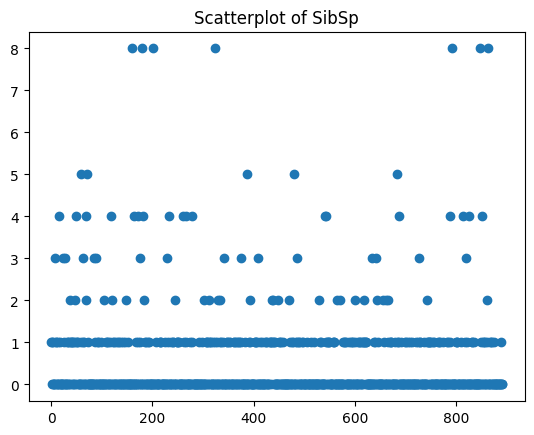

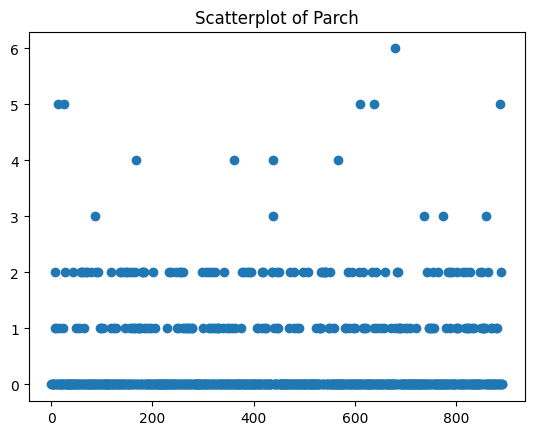

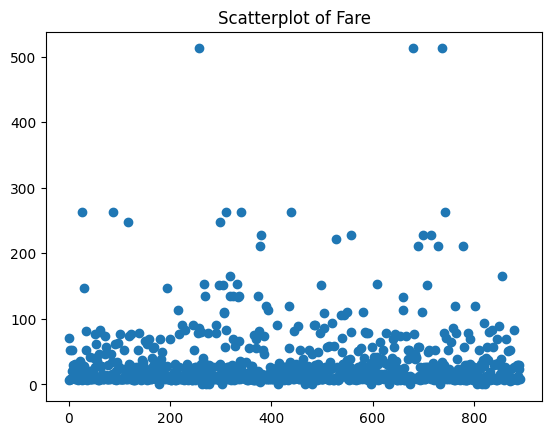

In [30]:
for column in numeric_columns:
    plt.figure()  # Create a new figure for each scatterplot
    plt.scatter(x=df.index, y=df[column])
    plt.title(f'Scatterplot of {column}')
    plt.show()

# **SECTION 7 – Grouping & Aggregation**

21. Choose a categorical column (e.g., Gender, City, Department).

In [33]:
categorical_column = 'Sex'
categorical_column

'Sex'

22. Perform group-by analysis:

In [39]:
df.groupby(categorical_column).mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,-0.111880,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,0.060884,0.429809,0.235702,25.523893


23. Which group has:

highest fare (if exists)

In [40]:
df.groupby(categorical_column)['Fare'].max()

,Fare
Sex,
female,512.3292
male,512.3292


highest median age

In [41]:
df.groupby(categorical_column)['Age'].median()

,Age
Sex,
female,-0.041851
male,-0.041851


best distribution or least variance

In [42]:
df.groupby(categorical_column)['Fare'].std()

,Fare
Sex,
female,57.997698
male,43.138263


24. Visualize the grouped summary using bar or box plots.

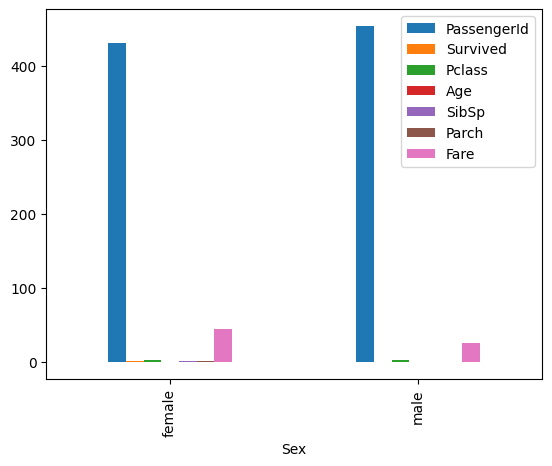

In [43]:
df.groupby(categorical_column).mean(numeric_only=True).plot(kind='bar')
plt.show()

# **SECTION 8 – Save Outputs**

25. Save

Final Visualizations

In [44]:
plt.savefig('final_visualizations.png')

<Figure size 640x480 with 0 Axes>

Correlation matrix

In [45]:
# save correlation matrix

plt.savefig('correlation_matrix.png')

<Figure size 640x480 with 0 Axes>